In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
df = pd.read_csv('smsspamcollection.tsv',sep='\t')

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [5]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['label'])

In [8]:
df.head()

,label,message,length,punct,target
0,ham,"Go until jurong point, crazy.. Available only ...",111,9,0
1,ham,Ok lar... Joking wif u oni...,29,6,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6,1
3,ham,U dun say so early hor... U c already then say...,49,6,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2,0


In [9]:
df.duplicated().sum()

403

In [10]:
df = df.drop_duplicates(keep='first')

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(5169, 5)

In [13]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [14]:
import spacy

In [15]:
nlp = spacy.load('en_core_web_sm')

In [16]:
df['num_sentences'] = df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [17]:
df['message'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [18]:
list(nlp(df['message'][2]).sents)

[Free entry in 2 a wkly comp to win FA Cup final tkts 21st,
 May 2005.,
 Text FA to 87121 to receive entry question(std txt rate)T&C's apply,
 08452810075over18's]

In [19]:
df.head()

,label,message,length,punct,target,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,9,0,2
1,ham,Ok lar... Joking wif u oni...,29,6,0,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6,1,2
3,ham,U dun say so early hor... U c already then say...,49,6,0,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2,0,1


In [20]:
df.describe()

,length,punct,target,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,79.344554,4.059199,0.126330,1.969627
std,58.437457,4.416667,0.332253,1.443078
min,2.000000,0.000000,0.000000,1.000000
25%,36.000000,1.000000,0.000000,1.000000
50%,61.000000,3.000000,0.000000,1.000000
75%,119.000000,5.000000,0.000000,2.000000
max,910.000000,133.000000,1.000000,38.000000


In [21]:
df[df['target'] == 0].describe()

,length,punct,target,num_sentences
count,4516.000000,4516.000000,4516.0,4516.000000
mean,70.905890,3.830159,0.0,1.822852
std,56.715046,4.488122,0.0,1.374848
min,2.000000,0.000000,0.0,1.000000
25%,34.000000,1.000000,0.0,1.000000
50%,53.000000,3.000000,0.0,1.000000
75%,91.000000,5.000000,0.0,2.000000
max,910.000000,133.000000,0.0,38.000000


In [22]:
df[df['target'] == 1].describe()

,length,punct,target,num_sentences
count,653.000000,653.000000,653.0,653.000000
mean,137.704441,5.643185,1.0,2.984686
std,29.821348,3.500627,0.0,1.495313
min,13.000000,0.000000,1.0,1.000000
25%,132.000000,3.000000,1.0,2.000000
50%,148.000000,5.000000,1.0,3.000000
75%,157.000000,8.000000,1.0,4.000000
max,223.000000,26.000000,1.0,9.000000


# EDA

<AxesSubplot:xlabel='length', ylabel='Count'>

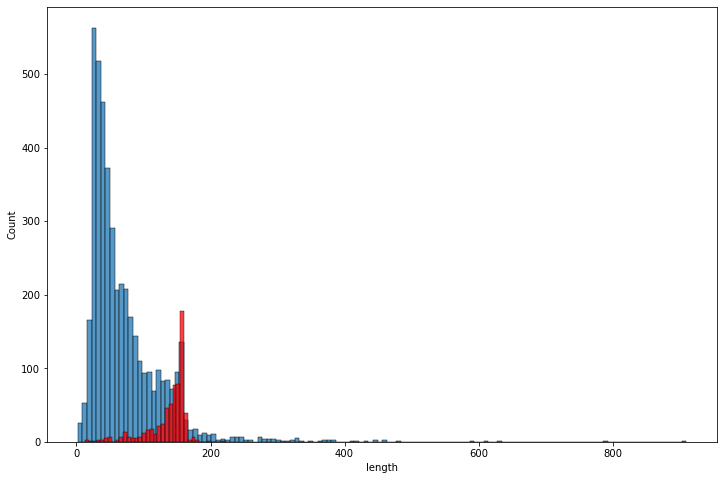

In [23]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['length'])
sns.histplot(df[df['target'] == 1]['length'], color = 'red')

<AxesSubplot:xlabel='punct', ylabel='Count'>

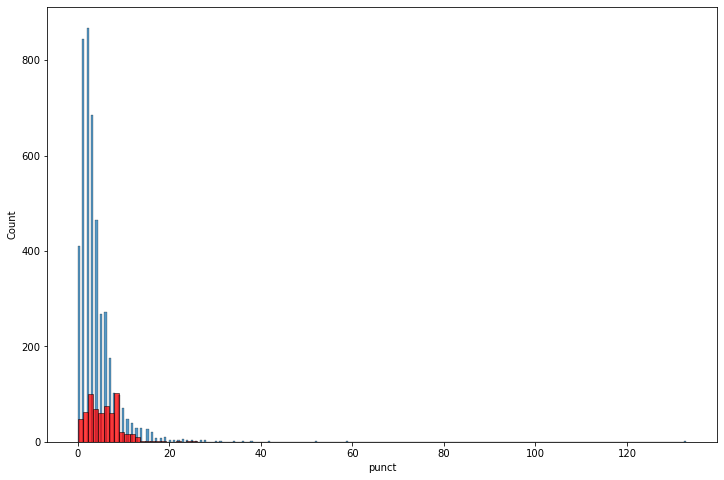

In [24]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['punct'])
sns.histplot(df[df['target'] == 1]['punct'], color = 'red')

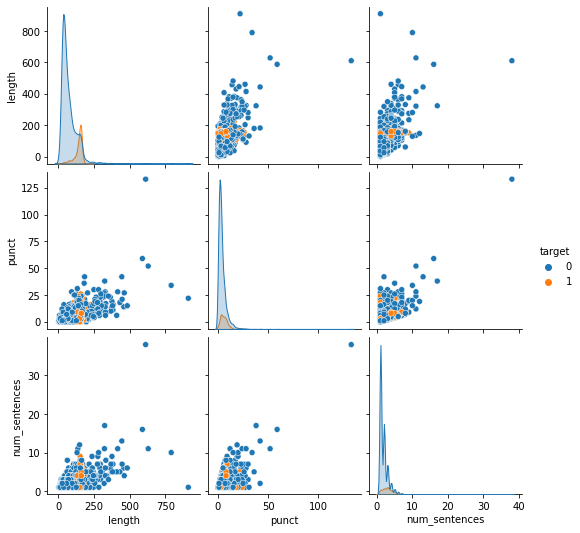

In [25]:
sns.pairplot(df,hue='target')

In [26]:
corr_matrix = df.corr()
corr_matrix.style.background_gradient(cmap='PuBu')

,length,punct,target,num_sentences
length,1.000000,0.621559,0.379791,0.624405
punct,0.621559,1.000000,0.136389,0.594658
target,0.379791,0.136389,1.000000,0.267500
num_sentences,0.624405,0.594658,0.267500,1.000000


# Data Preprocessing
     Lower case
 
     Tokenization
 
     Removal special characters
 
     Removing stop words and punctuation
 
     Stemming

In [27]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\enoch\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\enoch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [31]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [32]:
def transform_lower(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y.copy()
    y = []
    
    for i in text:
        if (i not in stopwords.words('english')) and (i not in string.punctuation):
            y.append(i)
            
    text = y.copy()
    y = []
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [33]:
transform_lower("Hi hello how Are You 20%& '!# %&\'()*+,-./:;<=>?@[\\]^_`{|}~'")

'hi hello 20'

In [34]:
df['transformed_message'] = df['message'].apply(transform_lower)

In [35]:
df.head()

,label,message,length,punct,target,num_sentences,transformed_message
0,ham,"Go until jurong point, crazy.. Available only ...",111,9,0,2,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,6,0,2,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6,1,2,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,6,0,1,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2,0,1,nah think goe usf live around though


In [36]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10, background_color ='white')

In [37]:
spam_wc = wc.generate(df[df['target']==1]['transformed_message'].str.cat(sep = " "))

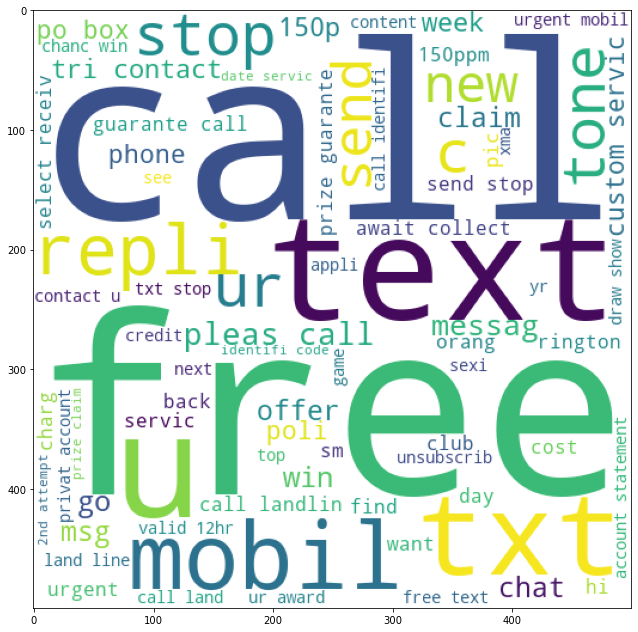

In [38]:
plt.figure(figsize = (11,11))
plt.imshow(spam_wc)

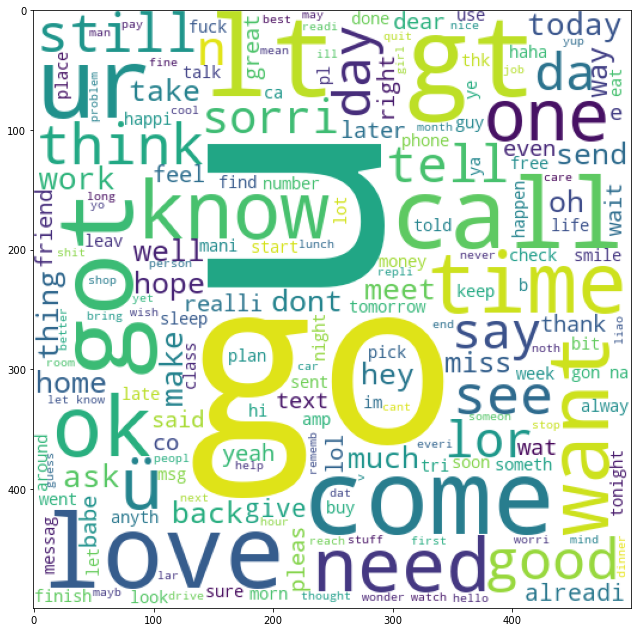

In [39]:
ham_wc = wc.generate(df[df['target']==0]['transformed_message'].str.cat(sep = " "))
plt.figure(figsize = (11,11))
plt.imshow(ham_wc)

In [40]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [41]:
len(spam_corpus)

9982

In [42]:
from collections import Counter


C:\Users\enoch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


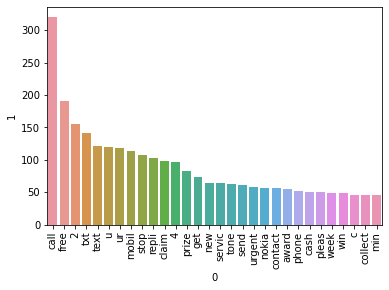

In [43]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [44]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [45]:
len(ham_corpus)

35937

C:\Users\enoch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


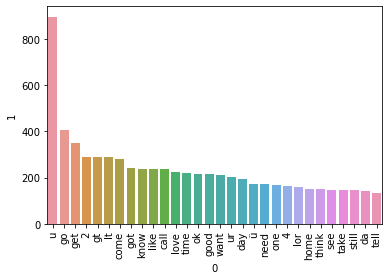

In [46]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [47]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [48]:
cv = CountVectorizer()
X = cv.fit_transform(df['transformed_message']).toarray()

In [49]:
tfidf = TfidfVectorizer(max_features = 3000)
X_tfidf = tfidf.fit_transform(df['transformed_message']).toarray()

In [50]:
X_tfidf.shape,X.shape

((5169, 3000), (5169, 6782))

In [51]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=2)

In [53]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [54]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [55]:
print('Gaussian Naive Bayes')
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print('Accuracy score : {}'.format(accuracy_score(y_test,y_pred)))
print('Precision score : {}'.format(precision_score(y_test,y_pred)))
print('Confusion matrix: \n {}'.format(confusion_matrix(y_test,y_pred)))

print('*'*50)
print('Mutlinomial Naive Bayes')
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)
print('Accuracy score : {}'.format(accuracy_score(y_test,y_pred)))
print('Precision score : {}'.format(precision_score(y_test,y_pred)))
print('Confusion matrix: \n {}'.format(confusion_matrix(y_test,y_pred)))

print('*'*50)
print('Bernoulli Naive Bayes')
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
print('Accuracy score : {}'.format(accuracy_score(y_test,y_pred)))
print('Precision score : {}'.format(precision_score(y_test,y_pred)))
print('Confusion matrix: \n {}'.format(confusion_matrix(y_test,y_pred)))

Gaussian Naive Bayes
Accuracy score : 0.8694390715667312
Precision score : 0.4794520547945205
Confusion matrix: 
 [[794 114]
 [ 21 105]]
**************************************************
Mutlinomial Naive Bayes
Accuracy score : 0.9680851063829787
Precision score : 0.8661417322834646
Confusion matrix: 
 [[891  17]
 [ 16 110]]
**************************************************
Bernoulli Naive Bayes
Accuracy score : 0.965183752417795
Precision score : 0.95
Confusion matrix: 
 [[903   5]
 [ 31  95]]


In [56]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [57]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.2, random_state = 2)
gnb.fit(X_train_tfidf,y_train)
y_pred = gnb.predict(X_test_tfidf)
print('Accuracy score : {}'.format(accuracy_score(y_test,y_pred)))
print('Precision score : {}'.format(precision_score(y_test,y_pred)))
print('Confusion matrix: \n {}'.format(confusion_matrix(y_test,y_pred)))

print('*'*50)
print('Mutlinomial Naive Bayes')
mnb.fit(X_train_tfidf,y_train)
y_pred = mnb.predict(X_test_tfidf)
print('Accuracy score : {}'.format(accuracy_score(y_test,y_pred)))
print('Precision score : {}'.format(precision_score(y_test,y_pred)))
print('Confusion matrix: \n {}'.format(confusion_matrix(y_test,y_pred)))

print('*'*50)
print('Bernoulli Naive Bayes')
bnb.fit(X_train_tfidf, y_train)
y_pred = bnb.predict(X_test_tfidf)
print('Accuracy score : {}'.format(accuracy_score(y_test,y_pred)))
print('Precision score : {}'.format(precision_score(y_test,y_pred)))
print('Confusion matrix: \n {}'.format(confusion_matrix(y_test,y_pred)))

Accuracy score : 0.8617021276595744
Precision score : 0.4618834080717489
Confusion matrix: 
 [[788 120]
 [ 23 103]]
**************************************************
Mutlinomial Naive Bayes
Accuracy score : 0.9690522243713733
Precision score : 1.0
Confusion matrix: 
 [[908   0]
 [ 32  94]]
**************************************************
Bernoulli Naive Bayes
Accuracy score : 0.9748549323017408
Precision score : 0.9807692307692307
Confusion matrix: 
 [[906   2]
 [ 24 102]]


In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [96]:
svc = SVC(kernel='sigmoid', gamma = 0.1)
lgc = LogisticRegression()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 50)
rfc = RandomForestClassifier(n_estimators =50)
abc = AdaBoostClassifier(n_estimators =50)
gbc = GradientBoostingClassifier(n_estimators=50)
xbc = XGBClassifier(n_estimators=50)
bc = BaggingClassifier(n_estimators=50)
etc = ExtraTreesClassifier(n_estimators=50)

In [97]:
classifiers = {'SVC' : svc,
              'LGC' :  lgc,
               'MNB' : mnb,
               'DTC' : dtc,
               'RFC' : rfc,
               'ADC' : abc,
               'GBC' : gbc,
               'XBG' : xbc,
               'BC'  : bc,
               'ETC' : etc}

In [99]:
for name, clf in classifiers.items():
    model = clf.fit(X_train_tfidf,y_train)
    y_pred = model.predict(X_test_tfidf)
    
    
    print('Name : {}, Accuracy_score : {}, Precision_score {}'.format(name, accuracy_score(y_test,y_pred), precision_score(y_test,y_pred)))
    

Name : SVC, Accuracy_score : 0.9284332688588007, Precision_score 1.0
Name : LGC, Accuracy_score : 0.9535783365570599, Precision_score 0.975609756097561
Name : MNB, Accuracy_score : 0.9690522243713733, Precision_score 1.0
Name : DTC, Accuracy_score : 0.9506769825918762, Precision_score 0.8
Name : RFC, Accuracy_score : 0.9661508704061895, Precision_score 0.9789473684210527
Name : ADC, Accuracy_score : 0.9661508704061895, Precision_score 0.9333333333333333
Name : GBC, Accuracy_score : 0.9410058027079303, Precision_score 0.922077922077922
Name : XBG, Accuracy_score : 0.9690522243713733, Precision_score 0.9519230769230769
Name : BC, Accuracy_score : 0.9555125725338491, Precision_score 0.8508771929824561
Name : ETC, Accuracy_score : 0.97678916827853, Precision_score 0.9722222222222222
